<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [60]:
# Импорт библиотеки pandas
import pandas as pd
# Импорт библиотеки numpy
import numpy as np
# Импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# Импорт библиотеки seaborn
import seaborn as sns
# Удаление ложных предупреждений
pd.options.mode.chained_assignment = None  # default='warn'
# Загрузка таблицы в память переменной df типа dataframe
df = pd.read_csv('/datasets/real_estate_data.csv')
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


<font color='DarkBlue'> 
📌 Импортированы все библиотеки, используемые далее в проекте <br>
📌 При попытке просмотра первых записей датасета обнаружился недочет в отсутствии верного разделителя в функции первоначальной загрузки данных. Судя по заголовку, это знак табуляции. <br>
</font> 

In [61]:
# Загрузка таблицы в память переменной df типа датафрейм
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
# Разделители для удобства отображения информации указаны в виде отдельных пунктов 'print("\033[1m\033[43m {}".format('----- Text -----'),"\033[0m")'
print("\033[1m\033[43m {}".format('----- Просмотр общей информации о dataframe -----'),"\033[0m")
df.info()
print("\033[1m\033[43m {}".format('----- Информация о заголовках полей dataframe -----'),"\033[0m")
print(df.columns)
print("\033[1m\033[43m {}".format('----- Информация о типах полей dataframe -----'),"\033[0m")
print(df.dtypes)
print("\033[1m\033[43m {}".format('----- Отображение на экране в читаемом виде первых записей таблицы dataframe для визуального анализа -----'),"\033[0m")
df.head()

 ----- Просмотр общей информации о dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name     

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<font color='DarkBlue'> 
📌 В ходе первичного анализа данных сделаны следующие выводы:

1. Все заголовки выведены в удобном для работы с ними формате, редактирование не требуется
2. Обнаружены пропуски в столбцах "ceiling_height", "living_area", "is_apartment", "kitchen_area", "balcony", "locality_name", "airports_nearest", "cityCenters_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest", "days_exposition". Желательно заполнить их подходящими для соответствующих записей значениями или, в противном случае, удалить. Не помешает удаление явных дубликатов, вероятность присутствия в таблице двух независимых объявлений абсолютно со всеми подобными параметрами крайне мала
3. Тип данных у полей "is_apartment", "first_day_exposition" и остальных числовых полей, необходимость отображения значений в виде дробных чисел у которых отсутствует, необходимо преобразовать, в дальнейшем можно уменьшить объем памяти для хранения данных
4. В данных таблицы некорректные значения не наблюдаются. Необходимо детально рассмотреть параметры значений для каждого столбца
5. Можно провести аналогию между некоторыми столбцами с помощью визуального анализа гистограмм полей и коэффициента корреляции 
</font>

In [62]:
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
print('Количество явных дубликатов',df.duplicated().sum())

Количество явных дубликатов 0


In [63]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<font color='DarkBlue'> 
📌 В первом приближении все значения в пределах допустимых за исключением минимальных значений стоимости, площадей и высоты потолков, но есть значения с нулевым расстоянием до аэропорта <br>
📌 Необходимо также проанализировать текстовые поля и булевые значения <br>
📌 Явных дубликатов не наблюдается 
</font>

In [64]:
for i in df.select_dtypes(include=['object','bool']):
    print('-----')
    display(df[i].describe())
    print(df[i].value_counts())

-----


count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2015-02-15T00:00:00      1
2015-10-17T00:00:00      1
2015-03-03T00:00:00      1
2016-08-09T00:00:00      1
2015-02-26T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64
-----


count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

False    2725
True       50
Name: is_apartment, dtype: int64
-----


count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object

False    23550
True       149
Name: studio, dtype: int64
-----


count     23699
unique        2
top       False
freq      23632
Name: open_plan, dtype: object

False    23632
True        67
Name: open_plan, dtype: int64
-----


count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

Санкт-Петербург                        15721
посёлок Мурино                           522
посёлок Шушары                           440
Всеволожск                               398
Пушкин                                   369
                                       ...  
поселок городского типа Кондратьево        1
деревня Малая Романовка                    1
садовое товарищество Садко                 1
поселок Гаврилово                          1
поселок Гладкое                            1
Name: locality_name, Length: 364, dtype: int64


<font color='DarkBlue'> 
📌 Для поля "is_apartment" указан тип object, но есть только 2 уникальных значения True и False, поэтому можно преобразовать в булевый тип <br>
📌 Необходимо отформатировать поле "first_day_exposition" в соответствующий тип для хранения временных значений, а также проверить, указывается ли полное время, включая часы, минуты и секунды <br>
📌 Количество объявлений в Санкт-Петербурге явно преобладает 
</font>

In [65]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'] = df['is_apartment'].astype('bool')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(df.dtypes)     
df.loc[(pd.DatetimeIndex(df['first_day_exposition']).hour > 0) | (pd.DatetimeIndex(df['first_day_exposition']).minute > 0) | (pd.DatetimeIndex(df['first_day_exposition']).second > 0),'first_day_exposition'].count()

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object


0

<font color='DarkBlue'> 
📌 В поле "first_day_exposition" часы, минуты и секунды не указываюся, следовательно, можно исключить их отображение в значениях поля
</font>     

In [66]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

<font color='DarkBlue'> 
📌 Можно построить гистограммы распределения всех нетекстовых значений датафрейма
</font>     

total_images


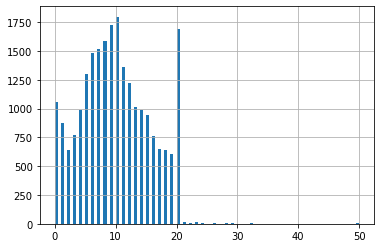

last_price


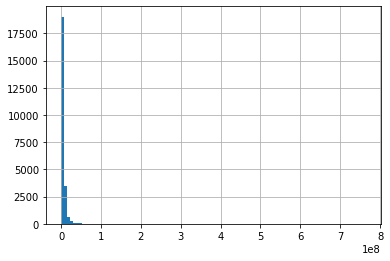

total_area


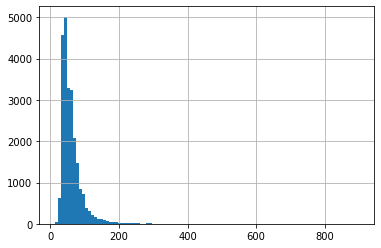

first_day_exposition


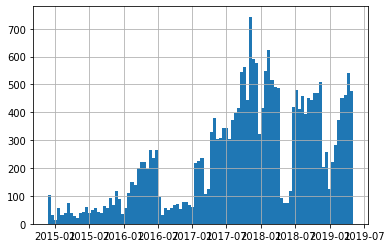

rooms


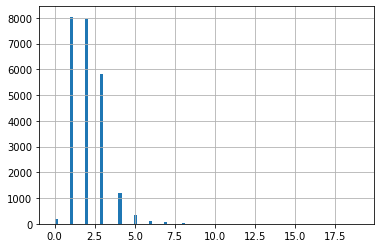

ceiling_height


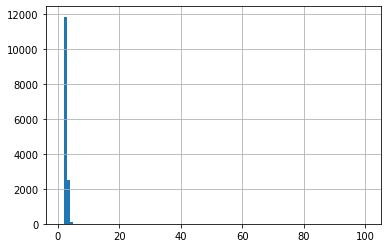

floors_total


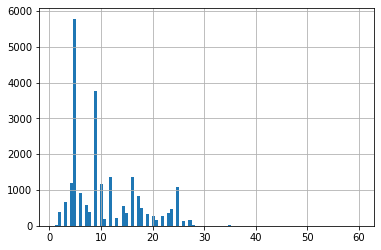

living_area


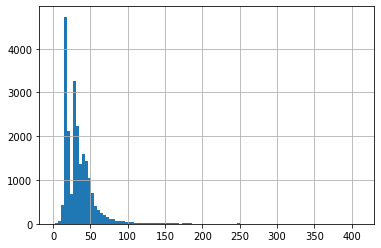

floor


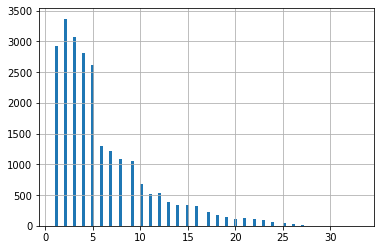

is_apartment


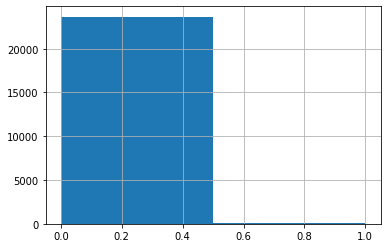

studio


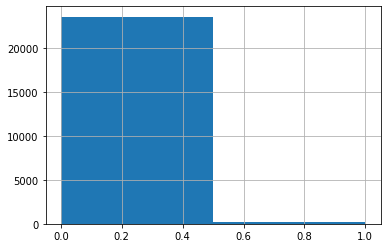

open_plan


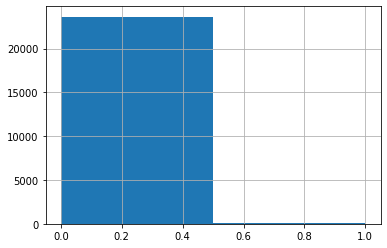

kitchen_area


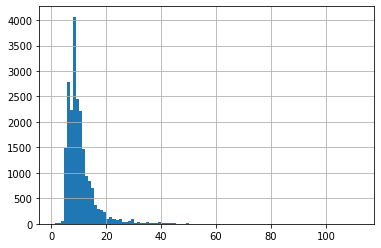

balcony


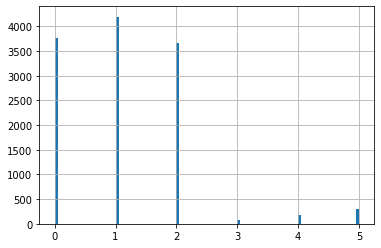

airports_nearest


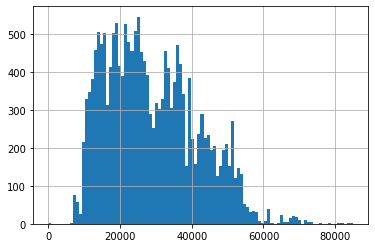

cityCenters_nearest


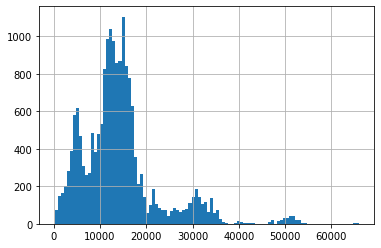

parks_around3000


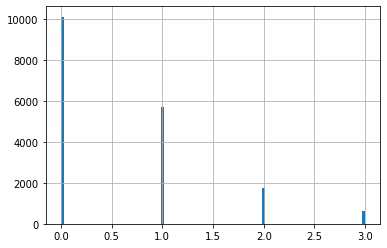

parks_nearest


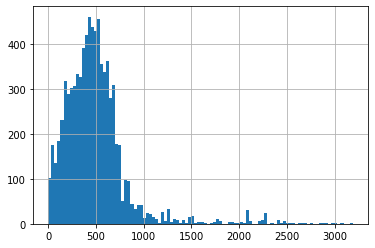

ponds_around3000


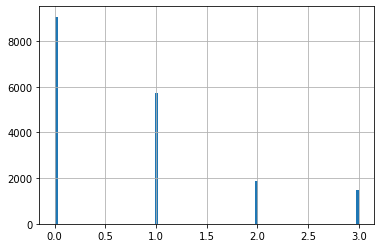

ponds_nearest


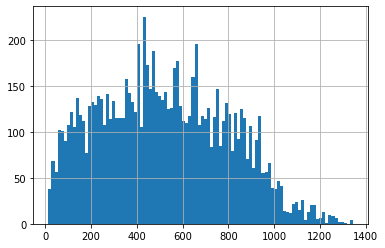

days_exposition


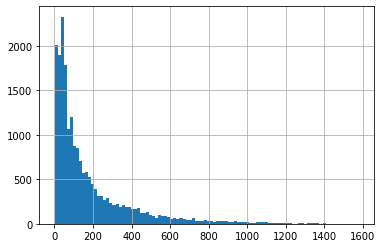

In [67]:
for i in df.select_dtypes(include=['bool','int','float','datetime']):   
    print(i)
    if i in df.select_dtypes(include=['bool']):
        df[i].astype('int').hist(bins=2)
        plt.show()  
    else:        
        df[i].hist(bins=100)
        plt.show()

<font color='DarkBlue'> 
📌 Исходя из графиков выше, можно сделать следующие выводы:
    
1. Очень большой разброс цен, большой разброс по площади квартиры, присутствуют квартиры с аномально высокми потолками   
2. Количество изображений редко предвышает 20, количество этажей - 30
3. Большинство объявлений выставлено в 2018-2019 годах
4. В большинстве на продажу выставлены 1-, 2-, 3- комнатные квартиры
5. Малое количество студий, квартир с открытой планировкой, 
6. Большое количество апартаментов в сравнении ссо стандартными квартирами, но исходя из предыдущего общего анализа прослеживается большое количество пропусков в этом поле
7. Есть квартиры, находящаяся в аэропорту
8. Расстояние до ближайших парков не превышает 3000, до ближайших прудов не превышает - 1400, возможно большие значения отсеивались
9. Дата публикации не коррелируется со временем размещения объявления
    
📌 Также можно составить таблицу с коэффициентами корреляции между значениями полей <br>

</font>     

In [68]:
display(df.select_dtypes(include=['bool','int','float','datetime']).corr())
# pd.plotting.scatter_matrix(pd.concat([df.select_dtypes(include=['bool']).astype('int'),df.select_dtypes(include=['int','float','datetime'])],axis=1),figsize=(50,50))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,0.010532,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,0.026958,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,0.029633,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,0.000399,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.154959,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,-0.026351,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,0.026969,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,-0.013294,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
is_apartment,0.010532,0.026958,0.029633,0.000399,0.154959,-0.026351,0.026969,-0.013294,1.000000,-0.003657,-0.002448,0.049034,0.043119,0.016470,0.003732,0.020767,-0.033410,0.023989,0.003357,0.015262
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,-0.003657,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476


<font color='DarkBlue'> 
📌 Исходя из таблицы выше можно выявить возможную взаимосвязь между следующими параметрами:
    
- стоимостью и площадью квартир
- количеством комнат и площадью квартир
- этажом квартиры и количеством этажей в доме
- наличием ближайших парков или прудов и расстоянием до них 
- стоимостью и расстоянием до центра города и до аэропорта
    
📌 Также можно построить графики наиболее взаимосвязанных величин
</font>     
<!--     - last_price с total_area
    - rooms с last_price и total_area
    - floors_total с rooms
    - living_area с last_price, total_area и rooms
    - floor с floors_total
    - kitchen_area c last_price, total_area и living_area
    - cityCenters_nearest с last_price, airports_nearest, total_area, kitchen_area living_area rooms
    - parks_around3000 с floors_total и ponds_around3000
    - ponds_around3000 с ponds_nearest -->

array([[<AxesSubplot:xlabel='is_apartment', ylabel='is_apartment'>,
        <AxesSubplot:xlabel='studio', ylabel='is_apartment'>,
        <AxesSubplot:xlabel='open_plan', ylabel='is_apartment'>,
        <AxesSubplot:xlabel='rooms', ylabel='is_apartment'>],
       [<AxesSubplot:xlabel='is_apartment', ylabel='studio'>,
        <AxesSubplot:xlabel='studio', ylabel='studio'>,
        <AxesSubplot:xlabel='open_plan', ylabel='studio'>,
        <AxesSubplot:xlabel='rooms', ylabel='studio'>],
       [<AxesSubplot:xlabel='is_apartment', ylabel='open_plan'>,
        <AxesSubplot:xlabel='studio', ylabel='open_plan'>,
        <AxesSubplot:xlabel='open_plan', ylabel='open_plan'>,
        <AxesSubplot:xlabel='rooms', ylabel='open_plan'>],
       [<AxesSubplot:xlabel='is_apartment', ylabel='rooms'>,
        <AxesSubplot:xlabel='studio', ylabel='rooms'>,
        <AxesSubplot:xlabel='open_plan', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>]], dtype=object)

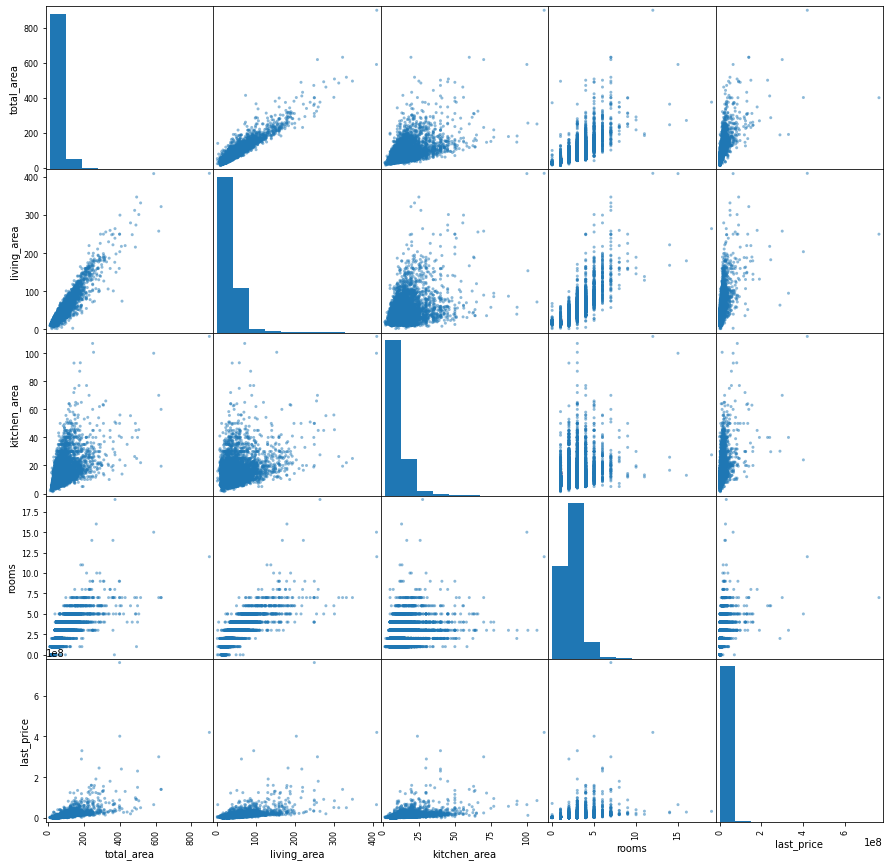

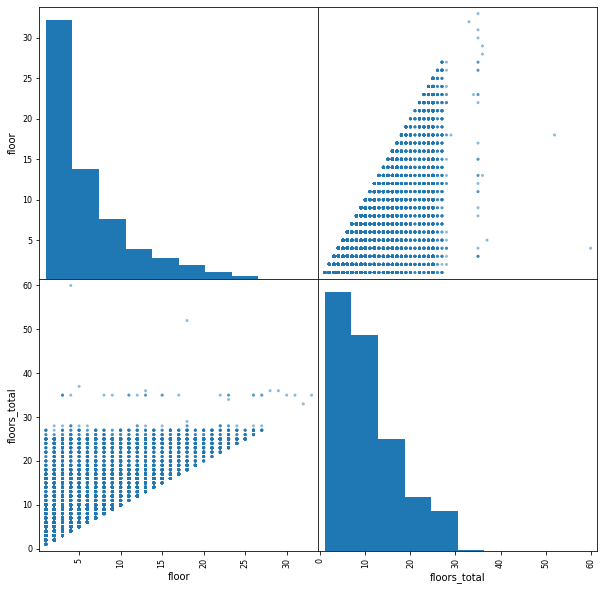

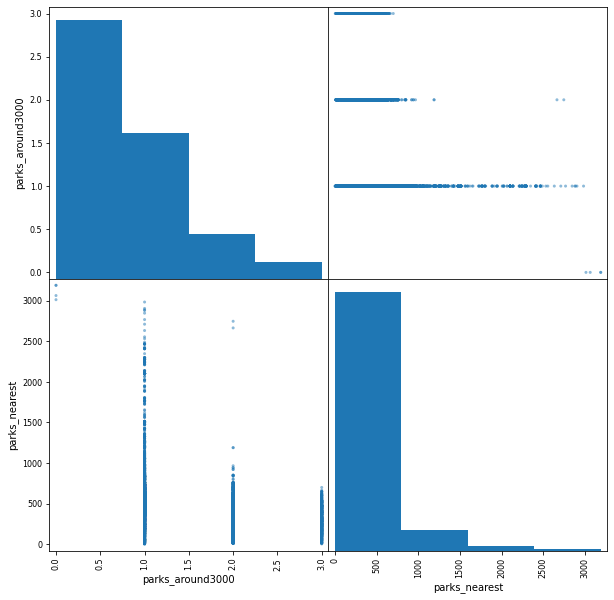

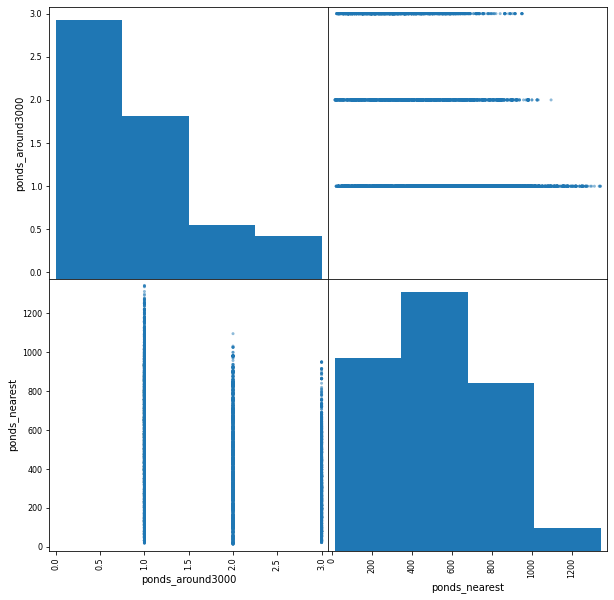

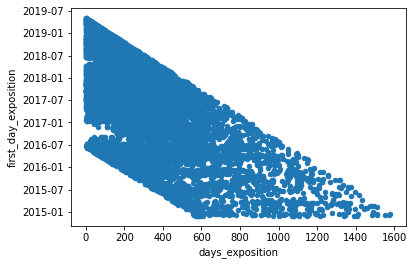

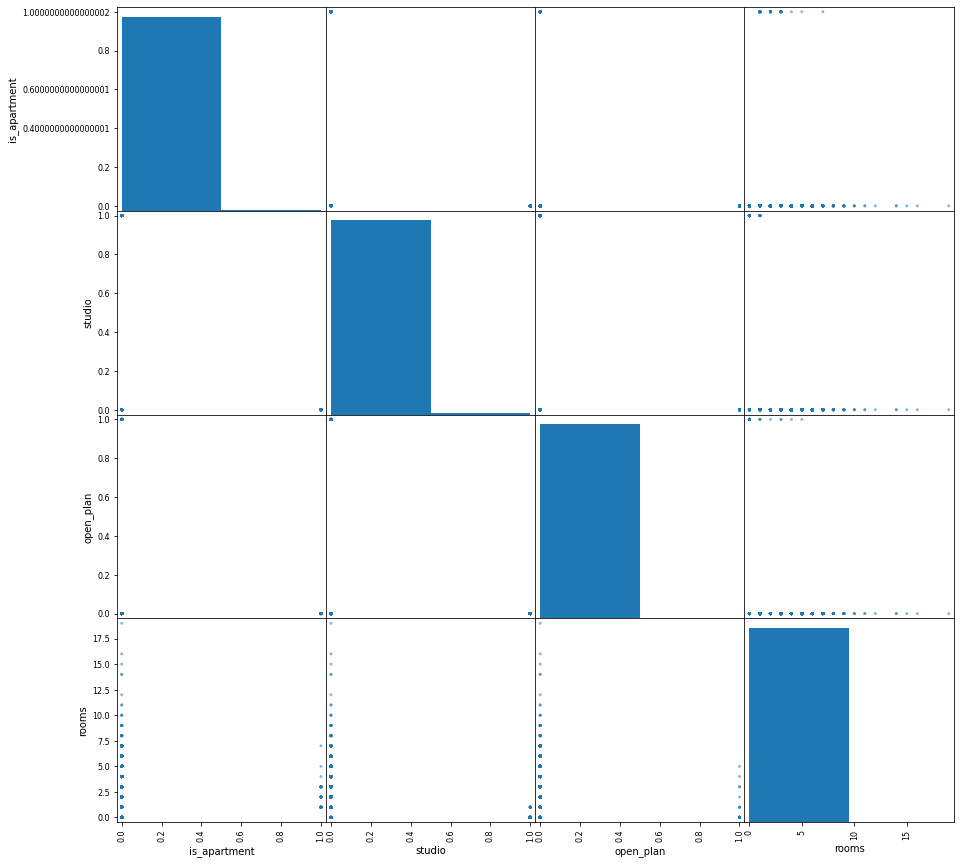

In [69]:
pd.plotting.scatter_matrix(df[['total_area','living_area','kitchen_area','rooms','last_price']],figsize=(15,15))
pd.plotting.scatter_matrix(df[['floor','floors_total']],figsize=(10,10))
pd.plotting.scatter_matrix(df[['parks_around3000','parks_nearest']],figsize=(10,10),hist_kwds={'bins':4})
pd.plotting.scatter_matrix(df[['ponds_around3000','ponds_nearest']],figsize=(10,10),hist_kwds={'bins':4})
df.plot(x='days_exposition',y='first_day_exposition', kind='scatter')
pd.plotting.scatter_matrix(pd.concat([df.select_dtypes(include=['bool']).astype('int'),df['rooms']],axis=1),figsize=(15,15),hist_kwds={'bins':2})

<font color='DarkBlue'> 
📌 Из текущих графиков вытекают следующие выводы:

- предыдущие гиппотезы относительно зависимостей между стоимостью и площадью подтвердились
- по этажности нет критических аномалий, под диагональю значения отсутствуют, значит нет указанных этажей выше последних в домах, но есть дома с этажностью более 50, хотя даже в Санкт-Петербурге нет зданий высотой более 40 этажей
- значений с расстоянием до ближайшего парка в диапазоне до 3000 м с нулевым количеством парков нет, как и с расстоянием больше 3000 м, значит данные заполнены верно
- значений с расстоянием до ближайшего пруда в диапазоне до 3000 м с нулевым количеством прудов нет, значит данные заполнены верно
- студий с открытой планировкой не существует, то есть возможно либо одно, либо другое
- есть студии или квартиры с открытой планировкой, но с комнатами, что противоречит концепции самих наименований
</font>     

## Предобработка данных

<font color='DarkBlue'> 
📌 Первоначально необходимо привести все значения к правдободобным и удалить аномалии, затем, где необходимо, заполнить пропуски <br>
📌 Необходимо проанализировать квартиры с большим количеством комнат, а также студии и квартиры с открытой планировкой с комнатами <br>    
</font>     

In [70]:
display(df[df['rooms'] > 10].sort_values(by='rooms',ascending=False))
# display(df[(df['rooms'] == 0) & (df['studio'] == False) & (df['open_plan'] == False)])
display(df[(df['rooms'] > 0) & (df['studio'] == True)]) # должно быть 0
display(df[(df['rooms'] > 0) & (df['open_plan'] == True)]) # должно быть 0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,False,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
20829,6,28659000.0,245.4,2016-03-31,14,NaN,4.0,168.3,2,False,False,False,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,False,False,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,False,False,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2389,5,2250000.0,25.41,2016-06-07,1,NaN,12.0,17.08,8,False,True,False,NaN,2.0,Санкт-Петербург,14125.0,12921.0,2.0,328.0,2.0,485.0,26.0
3187,13,3800000.0,27.00,2016-05-17,1,NaN,14.0,18.00,8,False,True,False,NaN,2.0,Санкт-Петербург,50348.0,16053.0,0.0,NaN,0.0,NaN,45.0
4180,4,4500000.0,34.00,2016-04-25,1,2.8,10.0,21.00,10,False,True,False,NaN,2.0,Санкт-Петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,62.0
8683,10,3500000.0,32.50,2016-05-05,1,3.0,23.0,29.90,11,False,True,False,NaN,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0
11026,1,2800000.0,28.00,2016-05-04,1,NaN,26.0,19.00,6,False,True,False,NaN,2.0,посёлок Парголово,53511.0,19687.0,0.0,NaN,0.0,NaN,45.0
12935,10,2200000.0,31.00,2016-05-15,1,2.5,8.0,22.30,5,False,True,False,NaN,1.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,44.0
15142,2,2700000.0,30.00,2016-05-10,1,NaN,21.0,26.00,6,False,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,55.0
18732,4,2400000.0,22.00,2016-05-06,1,NaN,10.0,15.00,6,False,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
20086,0,1550000.0,22.00,2016-05-11,1,2.7,15.0,10.94,14,False,True,False,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21702,9,2349000.0,23.40,2016-05-19,1,2.7,20.0,16.00,8,False,True,False,NaN,1.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,34.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1379,3,6000000.0,44.2,2015-11-10,1,NaN,25.0,17.4,23,False,False,True,NaN,1.0,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,231.0
5668,9,3550000.0,36.7,2016-04-25,1,2.75,16.0,17.8,2,False,False,True,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,61.0
8861,13,5500000.0,64.5,2015-11-13,3,3.00,5.0,48.0,2,False,False,True,NaN,0.0,Санкт-Петербург,20040.0,2621.0,2.0,205.0,2.0,204.0,229.0
9063,6,3800000.0,39.0,2016-05-19,1,NaN,17.0,30.0,1,False,False,True,NaN,0.0,Санкт-Петербург,36721.0,13635.0,0.0,NaN,0.0,NaN,45.0
12760,0,3350000.0,51.0,2015-01-22,2,2.50,12.0,30.0,10,False,False,True,NaN,2.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,521.0
14017,13,3990000.0,59.0,2016-03-29,3,2.50,9.0,37.6,3,False,False,True,NaN,1.0,Колпино,27820.0,33606.0,0.0,NaN,1.0,705.0,81.0
17783,3,48763000.0,157.0,2016-04-01,5,NaN,11.0,NaN,5,False,False,True,NaN,0.0,Санкт-Петербург,28399.0,7101.0,2.0,290.0,3.0,221.0,90.0
19796,1,12000000.0,97.2,2016-04-05,4,3.35,5.0,71.3,2,False,False,True,NaN,0.0,Санкт-Петербург,24559.0,4811.0,0.0,NaN,0.0,NaN,89.0


<font color='DarkBlue'> 
📌 Квартиры с большим количеством комнат имеют большую площадь <br>
📌 Нужно заполнить количество комнат в студиях и квартирах со свободной планировкой корректными значениями, затем проверить на отсутсвие неверных значений в данных категориях квартир <br>
</font>  

In [71]:
df.loc[(df['rooms'] > 0) & (df['studio'] == True),'rooms'] = 0
print('Количество студий с комнатами:',df[(df['rooms'] > 0) & (df['studio'] == True)]['rooms'].count()) # должно быть 0
df.loc[(df['rooms'] > 0) & (df['open_plan'] == True),'rooms'] = 0
print('Количество квартир с открытой планировкой с комнатами:',df[(df['rooms'] > 0) & (df['open_plan'] == True)]['rooms'].count()) # должно быть 0

Количество студий с комнатами: 0
Количество квартир с открытой планировкой с комнатами: 0


<font color='DarkBlue'> 
📌 Можно провести проверку на наличие несоответствующих значений площадей, то есть при превышении допустимой для жилой площади или кухни <br>
</font>  

In [72]:
# Проверка на несоответствие площади
print('Количество записей с ошибками в указанных значениях площадей:',df[(df['total_area'] < df['living_area']) | (df['total_area'] < df['kitchen_area'])]['total_area'].count())

Количество записей с ошибками в указанных значениях площадей: 0


<font color='DarkBlue'> 
📌 Можно проанализировать квартиры с очень большой и малой стоимостью <br>
</font>  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6859,6,490000.0,40.0,2017-12-11,1,NaN,5.0,NaN,3,False,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0
10782,3,490000.0,29.1,2016-05-05,1,2.50,5.0,17.0,5,False,False,False,5.5,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
16032,8,480000.0,32.0,2019-01-06,1,NaN,2.0,16.0,1,False,False,False,NaN,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0
18867,1,470000.0,41.0,2018-02-11,1,NaN,5.0,32.0,3,False,False,False,9.0,NaN,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0
21912,0,470000.0,37.0,2018-02-18,1,NaN,3.0,NaN,3,False,False,False,NaN,NaN,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23484,11,470000.0,44.5,2018-07-02,2,NaN,2.0,28.0,2,False,False,False,7.5,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.0
5698,7,450000.0,42.0,2017-07-31,2,NaN,1.0,23.0,1,False,False,False,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
9581,7,450000.0,43.4,2018-08-31,2,NaN,5.0,30.3,3,False,False,False,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
16219,14,450000.0,38.5,2018-07-11,2,2.65,2.0,NaN,1,False,False,False,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01,1,NaN,5.0,17.3,4,False,False,False,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,False,False,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,False,False,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,False,False,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,False,False,30.2,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,False,False,29.8,NaN,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,False,False,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
5893,3,230000000.0,500.0,2017-05-31,6,NaN,7.0,NaN,7,False,False,False,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0


<AxesSubplot:>

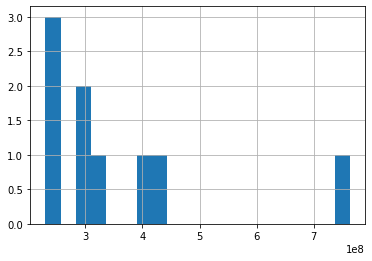

In [73]:
# print(df.loc[df['last_price'] > 2*10**8, 'last_price'].value_counts())
display(df[df['last_price'] < 5*10**5].sort_values(by='last_price',ascending=False))
display(df[df['last_price'] > 2*10**8].sort_values(by='last_price',ascending=False))
df.loc[df['last_price'] > 2*10**8, 'last_price'].hist(bins=20)

<font color='DarkBlue'> 
📌 Выявлена квартира с некорректно заниженной стоимостью, в 1000 раз меньше аналогичной на рынке, можно привести в соответсвие <br>
</font>  

In [74]:
df.loc[df['last_price'] < 10**5,'last_price'] *= 1000
print('Количество квартир с аномально низкой стоимостью:',df[df['last_price'] < 10**5]['last_price'].count())
display(df[df['last_price'] == 12190000])

Количество квартир с аномально низкой стоимостью: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190000.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
16579,19,12190000.0,100.0,2017-11-23,3,2.90,16.0,51.0,5,False,False,False,25.0,2.0,Санкт-Петербург,36765.0,11777.0,0.0,NaN,0.0,NaN,241.0


<font color='DarkBlue'> 
📌 Нужно проанализировать квартиры с аномально высокими и низкими потолками<br>
</font>  

In [75]:
display(df[df['ceiling_height'] > 6])
display(df[df['ceiling_height'] < 2])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,False,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,False,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,False,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


<font color='DarkBlue'> 
📌 Возможно есть 2- или 3-этажные квартиры, но маловероятно их наличие с высотой более 10 м и менее 2 м. Заметно, что если высота более 20 м, скорее всего есть факт наличия разрядности, можно разделить на 10. Соответственно можно усреднить оставшиеся некорректные значения. Разброс небольшой, поэтому после преобразования выбросов можно усреднить с помощью среднего арифметического значения. В дальнейших расчетах и сравнениях этот параметр не будет играть основную роль <br>
</font>  

In [76]:
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] /= 10
#df['ceiling_height'].where((~(df['ceiling_height'] >= 10)) | (~(df['ceiling_height'] < 2)), df['ceiling_height'].mean())
df.loc[(df['ceiling_height'] >= 10) | (df['ceiling_height'] < 2),'ceiling_height'] = round(df['ceiling_height'].mean(),1)
display(df[df['ceiling_height'] > 5])
df['ceiling_height'] = df['ceiling_height'].fillna(round(df['ceiling_height'].mean(),1))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11,6,5.2,8.0,159.5,7,False,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3.0,190.0,3,False,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6.0,NaN,6,False,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,False,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5.0,83.0,5,False,False,False,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5.0,NaN,5,False,False,False,NaN,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,False,False,False,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,False,False,False,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
20264,17,119000000.0,187.6,2017-07-10,4,6.0,7.0,147.0,7,False,False,False,15.6,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0


<font color='DarkBlue'> 
📌 Необходимо заполнить пропуски в поле с длительностью размещения объявления <br>
📌 Нужно определить максимальное время размещения объявления, а также минимальную и максимальную даты публикации <br>
📌 Можно посчитать количество объявлений, размещенный в последний день, а также наличие в них заполненного поля с длительностью размещения <br>   
</font>  

In [77]:
#print(df['first_day_exposition'][1] + pd.Timedelta(df['days_exposition'][1].astype('str') + ' day'))
print('Максимальное время размещения объявления:',df['days_exposition'].max()/365)
print('Самая ранняя публикация:',df.loc[df['days_exposition'].isna(),'first_day_exposition'].min())
print('Самая поздняя публикация:',df.loc[df['days_exposition'].isna(),'first_day_exposition'].max())
print('Количество публикаций в последний день:',df.loc[df['first_day_exposition'] == df['first_day_exposition'].max(),'first_day_exposition'].count())
print('Количество публикаций в последний день c обозначенной длительностью размещения:',df[(df['first_day_exposition'] == df['first_day_exposition'].max()) & ~(df['days_exposition'].isna())]['first_day_exposition'].count())
print('Количество публикаций с датой закрытия объявления, большей чем дата самой поздней публикации:',df[(df['first_day_exposition'] + pd.to_timedelta(df['days_exposition'])) > df['first_day_exposition'].max()]['first_day_exposition'].count())

Максимальное время размещения объявления: 4.328767123287672
Самая ранняя публикация: 2014-11-27 00:00:00
Самая поздняя публикация: 2019-05-03 00:00:00
Количество публикаций в последний день: 20
Количество публикаций в последний день c обозначенной длительностью размещения: 0
Количество публикаций с датой закрытия объявления, большей чем дата самой поздней публикации: 0


<font color='DarkBlue'> 
📌 Можно сделать вывод о том, что у актуальных объявлений поле с длительностью размещения пустое. Поэтому можно его заполнить, предварительно объявив колонку с актуальностью предложения <br>
</font>  

In [78]:
df['actual'] = df['days_exposition'].isna()
df['days_exposition'] = df['days_exposition'].fillna((df['first_day_exposition'].max() - df['first_day_exposition']).dt.days)
print('Количество объявлений без указания длительности размещения:',df.loc[df['days_exposition'].isna(),'days_exposition'].count())

Количество объявлений без указания длительности размещения: 0


<font color='DarkBlue'> 
📌 Можно проверить, входят ли в одну выборку все значения с отсутствующими полями во всех столбцах с информацией о расположении к объектам, то есть отсутствие значений в этих столбцах привязано только к одному стеку записей <br>
</font>

In [79]:
print('Количество строк без данных о расположении:',df[(df['airports_nearest'].isna()) & (df['cityCenters_nearest'].isna()) & (df['parks_around3000'].isna()) & (df['ponds_around3000'].isna()) & (df['parks_nearest'].isna()) & (df['ponds_nearest'].isna())]['last_price'].count())
#display(df[(df['cityCenters_nearest'].isna()) & (~(df['parks_around3000'].isna()))])

Количество строк без данных о расположении: 5518


<font color='DarkBlue'> 
📌 <b> 23699 </b> (Общее количество записей) <b> - 5518 </b> (Количество записей с отвутствующими значениями) <b> = 18181 </b> (количество записей со всеми значениями). Следовательно в строках, где нет данных в полях "parks_around3000" и "ponds_around3000", нет данных и в других столбцах, то есть нет картографической информации <br>
📌 Также можно проверить объявления, где нет расстояния до аэропорта или центра, но городом является Санкт-Петербург и где есть расстояние до аэропорта или центра, но городом не является Санкт-Петербург <br>
📌 Нужно проанализировать записи без привязки к населенному пункту <br>    
</font>

In [80]:
print('Объявления в Санкт-Петербурге без указания данных о расположении к аэропорту:',df[(df['airports_nearest'].isna()) & (df['locality_name'] == 'Санкт-Петербург')]['locality_name'].count())
print('Объявления в Санкт-Петербурге без указания данных о расположении к центру города:',df[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == 'Санкт-Петербург')]['locality_name'].count())
print('Объявления не в Санкт-Петербурге с указанием данных о расположении к аэропорту:',df[(~(df['airports_nearest'].isna())) & (df['locality_name'] != 'Санкт-Петербург')]['last_price'].count())
print('Объявления не в Санкт-Петербурге с указанием данных о расположении к центру города:',df[(~(df['cityCenters_nearest'].isna())) & (df['locality_name'] != 'Санкт-Петербург')]['last_price'].count())
display(df[df['locality_name'].isna()].head(20))

Объявления в Санкт-Петербурге без указания данных о расположении к аэропорту: 85
Объявления в Санкт-Петербурге без указания данных о расположении к центру города: 61
Объявления не в Санкт-Петербурге с указанием данных о расположении к аэропорту: 2521
Объявления не в Санкт-Петербурге с указанием данных о расположении к центру города: 2520


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,actual
1097,3,8600000.0,81.7,2016-04-15,3,3.55,5.0,50.80,2,False,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,False
2033,6,5398000.0,80.0,2017-05-30,3,2.70,4.0,42.60,2,False,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,False
2603,20,3351765.0,42.7,2015-09-20,1,2.70,24.0,15.60,3,False,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,False
2632,2,5130593.0,62.4,2015-10-11,2,2.70,24.0,33.10,21,False,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,False
3574,10,4200000.0,46.5,2016-05-28,2,2.70,5.0,30.80,5,False,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,False
4151,17,17600000.0,89.5,2014-12-09,2,3.00,8.0,39.62,7,False,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,False
4189,7,9200000.0,80.0,2015-12-10,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,False
4670,1,5500000.0,83.0,2015-08-14,3,2.70,7.0,NaN,6,False,False,False,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,False
5343,19,13540000.0,85.5,2016-01-20,3,2.70,7.0,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,False
5707,7,3700000.0,30.0,2016-04-29,1,2.70,24.0,20.00,23,False,False,False,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,False


<font color='DarkBlue'> 
📌 Есть объекты в Санкт-Петербурге, но без указания расстояния до аэропорта, таких значений мало. Значит не все данные получены автоматически на основе картографических данных. Также есть объекты не в Санкт-Петербурге, но с указанием расстояния до аэропорта <br>
📌 Исходя из данных таблицы, не все цены соответствуют объектам Санкт-Петербурга. Таких значений мало, и в объявлениях, где нет указания о расстоянии до аэропорта, скорее всего городом является не Санкт-Петербург, и наоборот, но однозначно утверждать нельзя. Неверные значения могут исказить статистику по городам, так как это один из основных параметров, поэтому лучше удалить эти объекты из датасета <br>
📌 Также нужно проанализировать значения с минимальным расстоянием до аэропорта, так как есть нулевые значения <br>    
</font>

In [81]:
df = df[~df['locality_name'].isna()]
df.sort_values(by='airports_nearest').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,actual
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,False,False,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,False
4017,7,2268000.0,35.0,2017-12-21,1,2.7,9.0,14.0,6,False,False,False,8.0,NaN,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,25.0,False
12899,8,4199000.0,56.0,2017-12-21,2,2.7,9.0,27.0,5,False,False,False,15.0,NaN,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,24.0,False
7778,9,2750000.0,29.0,2017-02-19,1,2.5,4.0,15.0,1,False,False,False,6.0,0.0,Санкт-Петербург,6914.0,21486.0,1.0,215.0,0.0,NaN,43.0,False
23150,3,6490000.0,62.5,2015-03-18,2,2.7,24.0,33.5,15,False,False,False,9.0,4.0,Санкт-Петербург,6949.0,13165.0,1.0,711.0,0.0,NaN,917.0,False


<font color='DarkBlue'> 
📌 Искомый объект находится в Санкт-Петербурге, можно будет усреднить пропущенное значение
📌 Также можно заполнить пропущенные значения полей "airports_nearest" и "cityCenters_nearest" усредненными для соответствующих городов. Можно создать серию, сгруппированную по городам с количеством объявлений в каждом
📌 
</font>

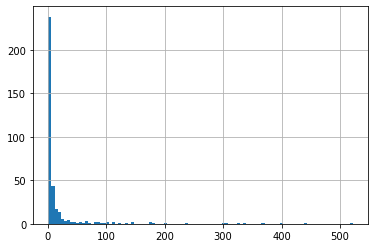

In [82]:
df[df['locality_name'] != 'Санкт-Петербург']['locality_name'].value_counts().hist(bins=100)
df_location = df[(~df['airports_nearest'].isna()) & (~df['cityCenters_nearest'].isna())].groupby('locality_name')['locality_name'].count().sort_values(ascending=False)

<font color='DarkBlue'> 
📌 Города с малым количеством объявлений рекомендуется объединить в одну группу и создать новую колонку в исходном датафрейме с городами с наибольшим количеством объявлений и общей группой из остальных городов <br>
📌 Также нужно создать отдельную таблицу с усредненными для каждой группы расстояниями до центра города и аэропорта, затем объединить их. Результат можно проверить по уникальным значениям
</font>

In [83]:
#df.query('locality_name in @df_location.index[0]')
#df[df['locality_name'].isin(df_location.index)]
df_location = df_location[df_location > 100]
df['location'] = df['locality_name'].where(df['locality_name'].isin(df_location.index),'Other')
df_additional = round(df[['location','airports_nearest','cityCenters_nearest']].groupby('location').transform('median'))
df_additional.columns = ['group_airports_nearest','group_cityCenters_nearest']
df = pd.concat([df,df_additional],axis=1)
print(df['group_airports_nearest'].unique())
print(df['group_cityCenters_nearest'].unique())

[26758. 17427. 30352. 53426. 48416. 39231. 15766. 26232. 56692. 25716.]
[12244. 24212. 32760. 19311. 51677. 33771. 27930. 32018. 34821. 29140.]


<font color='DarkBlue'> 
📌 Далее нужно присвоить пропускам средние значения по соответствующей группе <br>
📌 Также нужно заполнить нулевое значение поля "airports_nearest" и вывести на экран количество пропущенных значений
</font>

In [84]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['group_airports_nearest'])
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['group_cityCenters_nearest'])
df.loc[df['airports_nearest'] == 0,'airports_nearest'] = df['group_airports_nearest']
print(df['airports_nearest'].isna().sum())
print(df['cityCenters_nearest'].isna().sum())
#df.groupby('location')['group_airports_nearest'].median()

0
0


<font color='DarkBlue'> 
📌 Можно проверить наличие несоответствующих значений при указанном расстоянии до объектов, а также повторно удостовериться в отсутсвии значений у объектов при превышении указанного расстояния до них <br>
</font>  

In [85]:
# Проверка на несоответствие наличия парков и прудов
print('Отсутсвие количества парков при указанном расстоянии до них:',df[((df['parks_around3000'] == 0) | (df['parks_around3000'].isna())) & (df['parks_nearest'] < 3000)]['parks_nearest'].count())
print('Отсутсвие количества прудов при указанном расстоянии до них:',df[((df['ponds_around3000'] == 0) | (df['ponds_around3000'].isna())) & (df['ponds_nearest'] < 3000)]['ponds_nearest'].count())
print('Наличие парков при непопадании в заданный интервал 3000 м:',df[(df['parks_around3000'] > 0) & (df['parks_nearest'] > 3000)]['parks_nearest'].count())
print('Наличие прудов при непопадании в заданный интервал 3000 м:',df[(df['ponds_around3000'] > 0) & (df['ponds_nearest'] > 3000)]['ponds_nearest'].count())

Отсутсвие количества парков при указанном расстоянии до них: 0
Отсутсвие количества прудов при указанном расстоянии до них: 0
Наличие парков при непопадании в заданный интервал 3000 м: 0
Наличие прудов при непопадании в заданный интервал 3000 м: 0


<font color='DarkBlue'> 
📌 Также можно проверить есть ли записи с отсутствующими значениями расстояния при наличии рассматриваемых объектов <br>
📌 Нужно проверить гиппотезу о том, что в тех объявлениях, в которых количество прудов и парков 0, не указано расстояние. <br>  
</font>

In [86]:
print('Наличие ближайших парков в объявлениях без указания расстояний:',df[(df['parks_around3000'] > 0) & (df['parks_nearest'].isna())]['parks_around3000'].count())
print('Наличие ближайших прудов в объявлениях без указания расстояний:',df[(df['ponds_around3000'] > 0) & (df['ponds_nearest'].isna())]['ponds_around3000'].count())
print('Отсутствие значения расстояния при нулевом количестве ближайших парков:',df[(df['parks_around3000'] == 0) & (~(df['parks_nearest'].isna()))]['parks_around3000'].count())
print('Отсутствие значения расстояния при нулевом количестве ближайших прудов:',df[(df['ponds_around3000'] == 0) & (~(df['ponds_nearest'].isna()))]['ponds_around3000'].count())

Наличие ближайших парков в объявлениях без указания расстояний: 0
Наличие ближайших прудов в объявлениях без указания расстояний: 0
Отсутствие значения расстояния при нулевом количестве ближайших парков: 4
Отсутствие значения расстояния при нулевом количестве ближайших прудов: 0


<font color='DarkBlue'> 
📌 Нет таких значений, где пруды и парки есть, а указанных расстояний до них нет <br>
📌 В тех объявлениях, в которых количество прудов и парков 0, не указано расстояние, но может быть больше 3000 м. Нужно оставить пропущенные значения расстояния при отсутствии ближайших объектов, так как они являются достоверными, если учитывать расстояние до 3000 м <br>  
📌 Также нужно установить нулевые значения для количества ближайших парков и прудов в тех объявлениях, где значения пропущены, так как скорее всего предполагалось, что их нет <br>    
</font>

In [87]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
print('Количество пропущенных значений в поле \'parks_around3000\':',df['parks_around3000'].isna().sum())
print('Количество пропущенных значений в поле \'ponds_around3000\':',df['ponds_around3000'].isna().sum())

Количество пропущенных значений в поле 'parks_around3000': 0
Количество пропущенных значений в поле 'ponds_around3000': 0


<font color='DarkBlue'> 
📌 В тех объявлениях, где пропущено количество балконов тоже скорее всего предполагалось, что их нет. Затем можно проверить отсутствие пропущенных значений в соответствующем поле датафрейма <br>  
</font>

In [88]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

<font color='DarkBlue'> 
📌 В поле этажности зданий присутсвуют пропуски. Можно проанализировать соответствующие записи <br>
📌 Также можно проверить корректность введенных параметров методом выявления дробных значений среди них     
</font>

In [89]:
display(df[df['floors_total'].isna()])
print('Количество некорректных значений этажности зданий:',df[(~(df['floors_total'].isna())) & (df['floors_total'] % 1 != 0)]['floors_total'].count())         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,actual,location,group_airports_nearest,group_cityCenters_nearest
186,12,11640000.0,65.2,2018-10-02,2,2.7,NaN,30.80,4,False,False,False,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,False,Санкт-Петербург,26758.0,12244.0
237,4,2438033.0,28.1,2016-11-23,1,2.7,NaN,20.75,1,False,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,False,Санкт-Петербург,26758.0,12244.0
457,4,9788348.0,70.8,2015-08-01,2,2.7,NaN,38.40,12,False,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,False,Санкт-Петербург,26758.0,12244.0
671,4,6051191.0,93.6,2017-04-06,3,2.7,NaN,47.10,8,False,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,False,Санкт-Петербург,26758.0,12244.0
1757,5,3600000.0,39.0,2017-04-22,1,2.7,NaN,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,False,Санкт-Петербург,26758.0,12244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.8,NaN,NaN,3,False,False,False,NaN,0.0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0,False,Санкт-Петербург,26758.0,12244.0
22656,4,4574160.0,64.5,2017-04-02,2,2.7,NaN,31.70,20,False,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0,False,Санкт-Петербург,26758.0,12244.0
22808,0,14569263.0,110.4,2016-11-20,3,2.7,NaN,45.38,6,False,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0,False,Санкт-Петербург,26758.0,12244.0
23590,0,21187872.0,123.3,2017-04-25,3,2.7,NaN,50.40,18,False,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0,False,Санкт-Петербург,26758.0,12244.0


Количество некорректных значений этажности зданий: 0


<font color='DarkBlue'> 
📌 Этажность совершенно разная в тех объявлениях, где значение пропущено. В дальнейшем необходимо будет определить группы для объектов по этажности: первый, последний или другой, поэтому пропущенные значения останутся и будут учитываться в промежуточной выборке <br>
📌 Присутствую пропущенные значения в полях, отображающих значения жилой площади и кухни. Необходимо восстановить пропущенные значения, исходя из среднего отношения данных размерностей к общей площади для соответсвующих типов квартир. У гистограмм данных параметров есть выбрасы, поэтому желательно использовать медианные значения  
</font>

In [90]:
#df_test.pivot_table(index=['children'], values='debt', aggfunc = {'debt':['sum','count','mean']})
#df.pivot_table(index=['is_apartment','open_plan','studio'],values=['kitchen_area','living_area','total_area'],aggfunc='median')
#df.groupby('kitchen_area').count()

In [91]:
print('Количество квартир с открытой планировкой с кухнями:',df[df['open_plan'] & (~(df['kitchen_area'].isna()))]['total_area'].count())
print('Количество студий с кухнями:',df[df['studio'] & (~(df['kitchen_area'].isna()))]['total_area'].count())
print('Количество апартаментов с кухнями:',df[df['is_apartment'] & (~(df['kitchen_area'].isna()))]['total_area'].count())
print('Количество объектов, не относящихся к данным группам и не имеющих размеры кухни:',df[(~df['open_plan']) & (~df['studio']) & (~df['is_apartment']) & (df['kitchen_area'].isna())]['total_area'].count())
print('Количество квартир с открытой планировкой с жилой площадью:',df[df['open_plan'] & (~(df['living_area'].isna()))]['total_area'].count())
print('Количество студий с жилой площадью:',df[df['studio'] & (~(df['living_area'].isna()))]['total_area'].count())
print('Количество апартаментов с жилой площадью:',df[df['is_apartment'] & (~(df['living_area'].isna()))]['total_area'].count())
print('Количество объектов, не относящихся к данным группам и не имеющих размеры жилой площади:',df[(~df['open_plan']) & (~df['studio']) & (~df['is_apartment']) & (df['living_area'].isna())]['total_area'].count())
print('Среднее отношение жилой площади к общей для всех групп объектов:',(df['living_area']/df['total_area']).median())
print('Среднее отношение площади кухни к общей для всех групп объектов:',(df['kitchen_area']/df['total_area']).median())

Количество квартир с открытой планировкой с кухнями: 0
Количество студий с кухнями: 0
Количество апартаментов с кухнями: 35
Количество объектов, не относящихся к данным группам и не имеющих размеры кухни: 2038
Количество квартир с открытой планировкой с жилой площадью: 62
Количество студий с жилой площадью: 139
Количество апартаментов с жилой площадью: 42
Количество объектов, не относящихся к данным группам и не имеющих размеры жилой площади: 1875
Среднее отношение жилой площади к общей для всех групп объектов: 0.5678598992678503
Среднее отношение площади кухни к общей для всех групп объектов: 0.1724137931034483


<font color='DarkBlue'> 
📌 У квартир со свободной планировкой и студий нет кухонь, поэтому пропущенные значения должны остаться, в остальных случаях их необходимо заполнить с помощью рассчитанного отношения, как и жилую площадь <br>
</font>

In [92]:
df.loc[(~df['open_plan']) & (~df['studio']),'kitchen_area'] = df['kitchen_area'].fillna(round(df['total_area']*((df['kitchen_area']/df['total_area']).median()),1))  

for i in [df['open_plan'],df['studio'],(~df['open_plan']) & (~df['studio'])]:
    print(i.name)
    print('Отношение жилой площади к общей:',(df.loc[i,'living_area']/df.loc[i,'total_area']).median()) 
    df.loc[i,'living_area'] = df['living_area'].fillna(round(df['total_area']*((df.loc[i,'living_area']/df.loc[i,'total_area']).median()),1))      

open_plan
Отношение жилой площади к общей: 0.6831492080393984
studio
Отношение жилой площади к общей: 0.6894049346879536
None
Отношение жилой площади к общей: 0.5666666666666667


<font color='DarkBlue'> 
📌 Наличие пропусков в данных скорее всего связано с несколькими факторами:
    
- отсутсвие автоматических картографических данных для некоторых объектов
- некоторые данные пользователи предпочли не заполнять предположительно в соотвествии с их ненадобностью
- некоторые данные предоставлены неверно вследствик ошибок, связанных с явлением человеческого фактора, например нулевое расстояние до аэропорта или квартира стоимостью в 12 тыс.
- техническая ошибка, заключающаяся в появлении значений в поле длительности размещения только в случае снятия объявления
</font>

In [93]:
# Там, где значения в одной строке df совпадают, нужно подсветить
# from collections import Counter
# index = []
# for i in range(len(df)):
#     a = df.loc[i,['last_price','total_area','ceiling_height','floor','days_exposition']]    
#     if [j for j,k in Counter(a).items() if k>1]:
#         index.append(i)
# display(df.loc[index])

## Расчёты и добавление результатов в таблицу

<font color='DarkBlue'> 
📌 Добавление столбца со значением стоимости за квадратный метр в таблицу
</font>

In [94]:
df['square'] = round(df['last_price']/df['total_area'])
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,actual,location,group_airports_nearest,group_cityCenters_nearest,square
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0,True,Санкт-Петербург,26758.0,12244.0,120370.0
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,False,посёлок Шушары,17427.0,24212.0,82921.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False,Санкт-Петербург,26758.0,12244.0,92786.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,90.1,9,False,False,False,27.4,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False,Санкт-Петербург,26758.0,12244.0,408176.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,False,Санкт-Петербург,26758.0,12244.0,100000.0


<font color='DarkBlue'> 
📌 Добавление столбцов со днем недели, месяцем и годом публикации объявления с помощью функции
</font>

In [95]:
def weekday(row):
    if row == 0:
        return 'Понедельник'
    elif row == 1:
        return 'Вторник'
    elif row == 2:
        return 'Среда'
    elif row == 3:
        return 'Четверг'
    elif row == 4:
        return 'Пятница'
    elif row == 5:
        return 'Суббота'
    elif row == 6:
        return 'Воскресенье'
    return 'error'
def month(row):
    if row == 1:
        return 'Январь'
    elif row == 2:
        return 'Февраль'
    elif row == 3:
        return 'Март'
    elif row == 4:
        return 'Апрель'
    elif row == 5:
        return 'Май'
    elif row == 6:
        return 'Июнь'
    elif row == 7:
        return 'Июль'
    elif row == 8:
        return 'Август'
    elif row == 9:
        return 'Сентябрь'
    elif row == 10:
        return 'Октябрь'
    elif row == 11:
        return 'Ноябрь'
    elif row == 12:
        return 'Декабрь'
    return 'error'
df['weekday'] = df['first_day_exposition'].dt.weekday.apply(weekday)
df['month'] = df['first_day_exposition'].dt.month.apply(month) 
df['year'] = df['first_day_exposition'].dt.year 
print('Количество незаполненных строк:', df.loc[(df['weekday'] == 'error') | (df['month'] == 'error'),'first_day_exposition'].count())
df.head()

Количество незаполненных строк: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,actual,location,group_airports_nearest,group_cityCenters_nearest,square,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0,True,Санкт-Петербург,26758.0,12244.0,120370.0,Четверг,Март,2019
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,False,посёлок Шушары,17427.0,24212.0,82921.0,Вторник,Декабрь,2018
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False,Санкт-Петербург,26758.0,12244.0,92786.0,Четверг,Август,2015
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,90.1,9,False,False,False,27.4,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False,Санкт-Петербург,26758.0,12244.0,408176.0,Пятница,Июль,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,False,Санкт-Петербург,26758.0,12244.0,100000.0,Вторник,Июнь,2018


<font color='DarkBlue'> 
📌 Добавление столбца группировкой по крайним этажам: первому, последнему и другому
</font>

In [96]:
def floor(row):
    a = row.split('_')
    if float(a[0]) == 1:
        return 'Первый'
    elif float(a[1]) - float(a[0]) == 0:
        return 'Последний'
    else:
        return 'Другой'
#df['group_floor'] = df[['floor','floors_total']].apply(lambda x: floor('_'.join([x['floor'].astype('str'),x['floors_total'].astype('str')])), axis=1)
df['group_floor'] = (df['floor'].astype('str') + '_' + df['floors_total'].astype('str')).apply(floor)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,actual,location,group_airports_nearest,group_cityCenters_nearest,square,weekday,month,year,group_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0,True,Санкт-Петербург,26758.0,12244.0,120370.0,Четверг,Март,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,False,посёлок Шушары,17427.0,24212.0,82921.0,Вторник,Декабрь,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False,Санкт-Петербург,26758.0,12244.0,92786.0,Четверг,Август,2015,Другой
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,90.1,9,False,False,False,27.4,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False,Санкт-Петербург,26758.0,12244.0,408176.0,Пятница,Июль,2015,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,False,Санкт-Петербург,26758.0,12244.0,100000.0,Вторник,Июнь,2018,Другой


<font color='DarkBlue'> 
📌 Добавление столбцов с соотношением жилой к общей площади и площади кухни к общей
</font>

In [97]:
df['living_to_total'] = round(df['living_area']/df['total_area'],2)
df['kitchen_to_total'] = round(df['kitchen_area']/df['total_area'],2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,actual,location,group_airports_nearest,group_cityCenters_nearest,square,weekday,month,year,group_floor,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0,True,Санкт-Петербург,26758.0,12244.0,120370.0,Четверг,Март,2019,Другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,False,посёлок Шушары,17427.0,24212.0,82921.0,Вторник,Декабрь,2018,Первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False,Санкт-Петербург,26758.0,12244.0,92786.0,Четверг,Август,2015,Другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,90.1,9,False,False,False,27.4,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False,Санкт-Петербург,26758.0,12244.0,408176.0,Пятница,Июль,2015,Другой,0.57,0.17
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,False,Санкт-Петербург,26758.0,12244.0,100000.0,Вторник,Июнь,2018,Другой,0.32,0.41


<font color='DarkBlue'> 
📌 Приведение типов данных с плавающей запятой к целочисленным в случае отсутствия пропущенных значений в столбцах и дробных значений
</font>

In [98]:
for i in df.select_dtypes(include=['float']):
    if df[i].count() == df['last_price'].count():
        try:
            if df.loc[(df[i] % 1 != 0),i].count() == 0:
                df[i] = df[i].astype('int')
        except: 
            pass
df.info()      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23650 non-null  int64         
 1   last_price                 23650 non-null  int64         
 2   total_area                 23650 non-null  float64       
 3   first_day_exposition       23650 non-null  datetime64[ns]
 4   rooms                      23650 non-null  int64         
 5   ceiling_height             23650 non-null  float64       
 6   floors_total               23565 non-null  float64       
 7   living_area                23650 non-null  float64       
 8   floor                      23650 non-null  int64         
 9   is_apartment               23650 non-null  bool          
 10  studio                     23650 non-null  bool          
 11  open_plan                  23650 non-null  bool          
 12  kitc

<font color='DarkBlue'> 
📌 Исходный датасет имеет достаточно малое использование памяти, так как в основном содержатся числовые данные. Можно уменьшить размер дополнительно способом, указанным ниже, если в дальнейшем не планируется проведение арифметических операций со значениями столбцов. Можно также уменьшить емкость для хранения типов данных оbject путем категоризации <br>
</font> 

In [99]:
df['days_exposition'] = df['days_exposition'].astype('int')
df[df.select_dtypes(include=['int']).columns] = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df[df.select_dtypes(include=['float']).columns] = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23650 non-null  uint8         
 1   last_price                 23650 non-null  uint32        
 2   total_area                 23650 non-null  float32       
 3   first_day_exposition       23650 non-null  datetime64[ns]
 4   rooms                      23650 non-null  uint8         
 5   ceiling_height             23650 non-null  float32       
 6   floors_total               23565 non-null  float32       
 7   living_area                23650 non-null  float32       
 8   floor                      23650 non-null  uint8         
 9   is_apartment               23650 non-null  bool          
 10  studio                     23650 non-null  bool          
 11  open_plan                  23650 non-null  bool          
 12  kitc

## Исследовательский анализ данных

<font color='DarkBlue'> 
📌 Необходимо изучить следующие параметры: площадь, цену, число комнат, высоту потолков. Можно построить гистограммы для каждого из них и изучить основные метрики для анализа.
</font>

,total_area,last_price,rooms,ceiling_height
count,23650.000000,2.365000e+04,23650.000000,23650.000000
mean,60.329071,6.541642e+06,2.068795,2.717053
std,35.661808,1.089638e+07,1.079626,0.229135
min,12.000000,4.300000e+05,0.000000,2.000000
50%,52.000000,4.650000e+06,2.000000,2.700000
99%,197.556995,3.600000e+07,5.000000,3.585100
max,900.000000,7.630000e+08,19.000000,8.300000


total_area


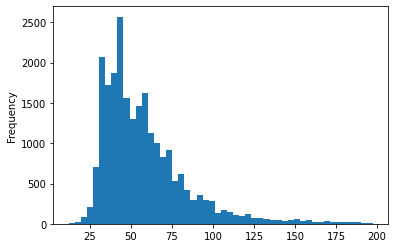

last_price


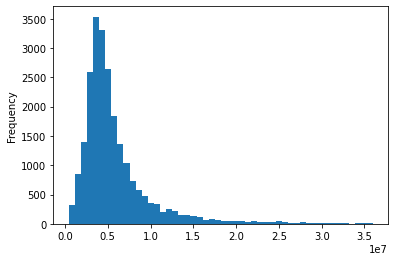

rooms


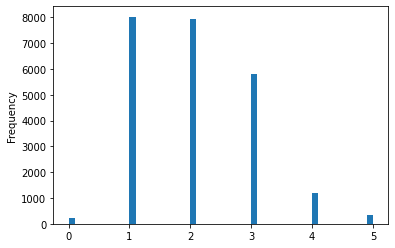

ceiling_height


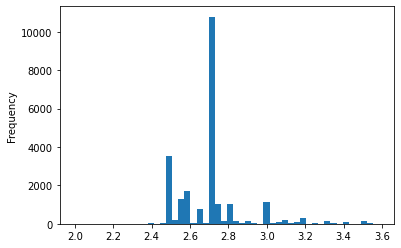

In [100]:
display(df[['total_area','last_price','rooms','ceiling_height']].describe(percentiles=[0.5, 0.99]))
for i in df[['total_area','last_price','rooms','ceiling_height']]:   
    print(i)      
    df[i].plot(kind='hist',bins=50,range=(df[i].min(),df[i].quantile(0.99)))
    plt.show()

<font color='DarkBlue'> 
📌 Графики выглядят более информативными при отсеивании процентиля аномально высоких значений. В среднем в объявлениях размещены двухкомнатные квартиры с площадью немногим более 50 квадратов в основном со стандартной высотой потолков 2.7 м и стоимостью немногим ниже 100 тыс. за квадрат. Судя по графику, в объявлениях очень много квартир площадью приблизительно 45 квадратов, 1- и 2-комнатных <br>
📌 Нужно изучить время продажи квартиры и построить гистограмму. Также можно высчитать среднее и медиану.
</font>

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

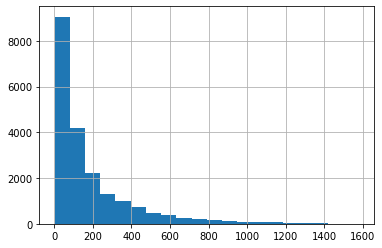

In [101]:
#display(df[['days_exposition','first_day_exposition','rooms','ceiling_height']].describe(percentiles=[0.5, 0.99]))   
#df[i].plot(kind='hist',bins=50,range=(df[i].min(),df[i].quantile(0.99)))
#display(df[~df['actual']].head())
df.loc[~df['actual'],'days_exposition'].hist(bins=20)
display(df.loc[~df['actual'],'days_exposition'].describe())


<font color='DarkBlue'> 
📌 В среднем время продажи составляет 95 дней. Среднее арифметическое в 2 раза больше, значит есть квартиры, продажа которых осуществлялась в течение очень большого периода времени. Скорость продажи категориально можно оценить, ограничив группы по процентилям. Можно предположить, что продажи прошли очень быстро, если сделка осуществилась в течение 45 дней, долго - если продажа состоялась более, чем через 230 дней от даты публикации <br>
📌 Редкие и выбивающиеся значения убраны на этапе предобработки. Были обнаружены аномально низкое значение стоимости объекта и нулевое расстояние до аэропорта. Также редко присутствуют как очень высокие, но в пределах разумных величин цены, площади и высота потолков, так и очень маленькие площади и расстояния до парков и прудов <br>
📌 Нужно определить, какие факторы больше всего влияют на стоимость квартиры, в частности, изучить, зависит ли цена от площади, числа комнат, удалённости от центра, а также зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, и от даты размещения: дня недели, месяца и года. Наглядно можно отобразить зависимости с помощью графиков в логарифмической шкале и диаграмм размаха, отображающих вероятность и частоту появления каждого признака
</font>

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.653809,0.362475,-0.268566
total_area,0.653809,1.000000,0.757822,-0.268029
rooms,0.362475,0.757822,1.000000,-0.201000
cityCenters_nearest,-0.268566,-0.268029,-0.201000,1.000000


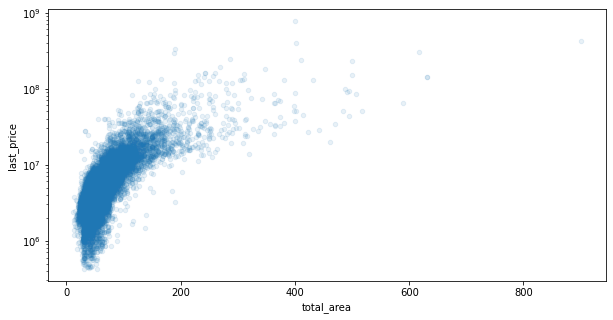

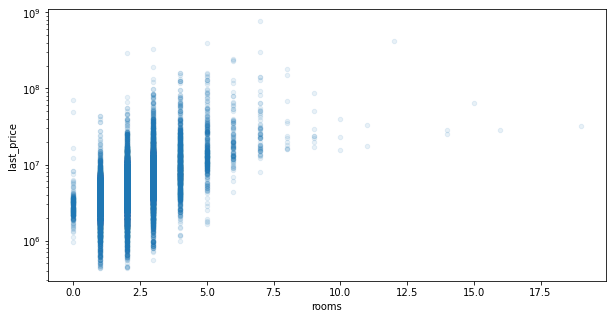

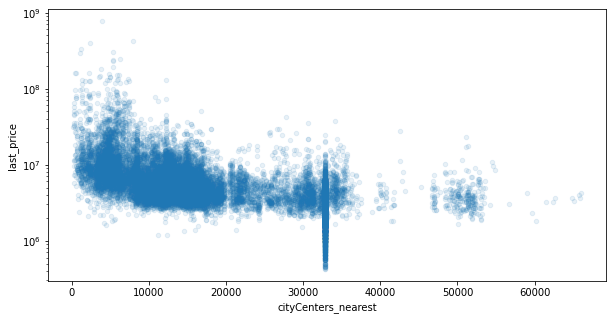

In [102]:
display(df[['last_price','total_area','rooms','cityCenters_nearest']].corr())
for i in df[['total_area','rooms','cityCenters_nearest']]:
    df.plot(x=i,y='last_price', kind='scatter',figsize=(10,5),alpha=0.1)
    plt.yscale('log')

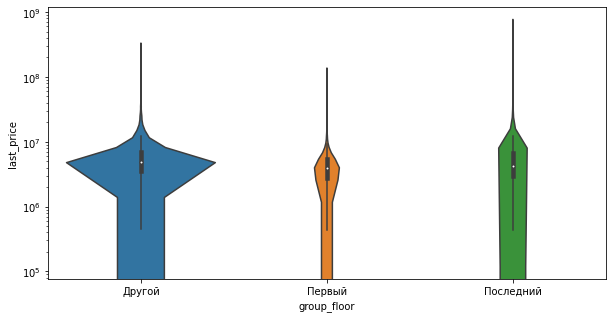

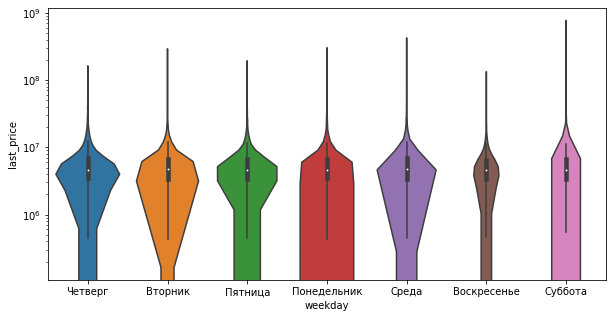

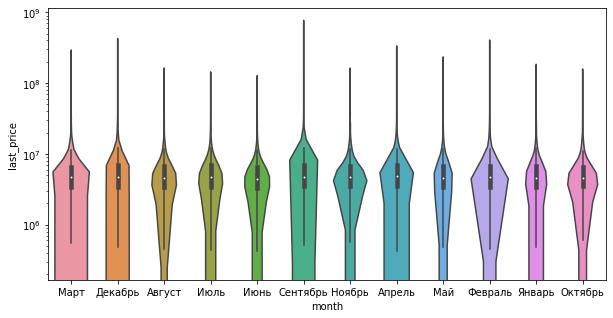

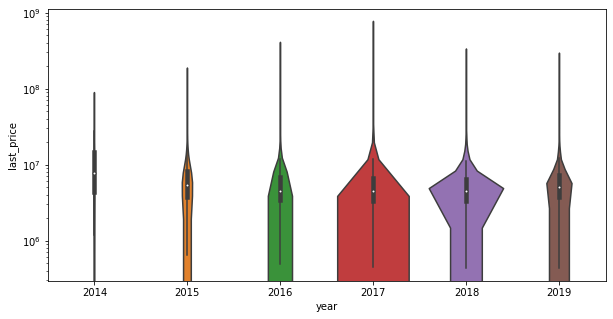

In [103]:
for i in df[['group_floor','weekday','month','year']]:
    #df[['last_price',i]].boxplot(by=i)
    plt.figure(figsize = (10,5))
    sns.violinplot(x=i, y="last_price", data=df, scale='count')
    plt.yscale('log')
    plt.show()

<font color='DarkBlue'> 
📌 На стоимость более всего влияет площадь, затем количество комнат и расположение от центра соответственно.
Площадь и количество комнат также хорошо коррелируются. Во всех взаимосвязях наблюдается прямо пропорциональная корреляция, то есть, чем больше значение одного признака, тем больше значение другого. Также на диаграмме очень явно прослеживается стек усредненных значений по расстоянию до центра <br>
📌 На первом этаже квартиры дешевле и их меньше, чем в остальных группах, на промежуточных этажах квартир больше всего и они дороже, чем на граничных <br>
📌 Больше всего объявлений было размещено по понедельникам, в частности, большего количества объектов с небольшой стоимостью. Также исходя из графических представлений количества объявлений по годам и месяцам можно утверждать, что большее количество публикаций приходилось на начало весны и 2017 год <br>
📌 Далее необходимо выбрать 10 населённых пунктов с наибольшим числом объявлений и определить среднюю цену квадратного метра в этих населённых пунктах. Также можно выделить населённые пункты с самой высокой и низкой стоимостью жилья
</font>

In [104]:
df_top10 = df.groupby('locality_name').agg({'locality_name':'count','square':'median'})
df_top10.rename(columns = {'locality_name' : 'count'}, inplace = True)
df_top10.sort_values(by='count',ascending=False).head(10).sort_values(by='square',ascending=False)

,count,square
locality_name,,
Санкт-Петербург,15721,104770.0
Пушкин,369,100000.0
деревня Кудрово,299,91860.0
посёлок Парголово,327,91643.0
посёлок Мурино,522,85878.5
посёлок Шушары,440,76876.0
Колпино,338,74723.5
Гатчина,307,67797.0
Всеволожск,398,65789.0


<font color='DarkBlue'> 
📌 Населенный пункт с самой высокой стоимостью жилья из 10 с наибольшим числом объявлений - Санкт-Петербург, с самой низкой -  Выборг. Цены на квадратный метр в этих населенных пунктах варьируются в диапазоне от 58158 руб. за квадратный метр до 104770 <br>
📌 Необходимо изучить предложения квартир на основе информации о расстоянии до центра и выделить квартиры в Санкт-Петербурге. Слудовательно нужно выяснить, какая область входит в центр. Можно создать столбец с расстоянием до центра в километрах, округлив до целых значений. После этого посчитайть среднюю цену для каждого километра и построить график, который должен показывать, как цена зависит от удалённости от центра. Также можно определить границу, где график сильно меняется, центральную зону
</font>

In [105]:
df['to_center_km'] = (df['cityCenters_nearest']/1000).astype('int')     
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,actual,location,group_airports_nearest,group_cityCenters_nearest,square,weekday,month,year,group_floor,living_to_total,kitchen_to_total,to_center_km
0,20,13000000,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482.0,2,755.0,57,True,Санкт-Петербург,26758,12244,120370,Четверг,Март,2019,Другой,0.47,0.23,16
1,7,3350000,40.400002,2018-12-04,1,2.70,11.0,18.600000,1,False,False,False,11.0,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81,False,посёлок Шушары,17427,24212,82921,Вторник,Декабрь,2018,Первый,0.46,0.27,18
2,10,5196000,56.000000,2015-08-20,2,2.70,5.0,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90.0,2,574.0,558,False,Санкт-Петербург,26758,12244,92786,Четверг,Август,2015,Другой,0.61,0.15,13
3,0,64900000,159.000000,2015-07-24,3,2.70,14.0,90.099998,9,False,False,False,27.4,0,Санкт-Петербург,28098,6800,2,84.0,3,234.0,424,False,Санкт-Петербург,26758,12244,408176,Пятница,Июль,2015,Другой,0.57,0.17,6
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112.0,1,48.0,121,False,Санкт-Петербург,26758,12244,100000,Вторник,Июнь,2018,Другой,0.32,0.41,8


<AxesSubplot:xlabel='to_center_km'>

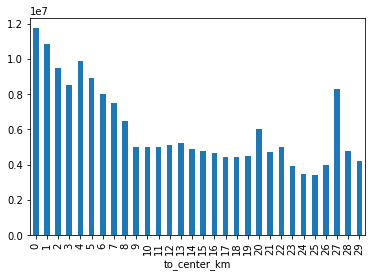

In [106]:
df[df['locality_name'] == 'Санкт-Петербург'].groupby('to_center_km')['last_price'].median().plot(kind='bar')

<font color='DarkBlue'> 
📌 График сильно меняется после 7 км, следовательно, центральная зона находится в пределах 7.5 км. Но присутствуют аномальные значения на расстоянии 20 и 27 км за счет большого количества дорогих квартир, возможно из-за большей площади или расположения рядом с иными культурными центрами <br>
📌 Наконец, можно выделить сегмент квартир в центре, проанализировать эту территорию и изучить следующие параметры: площадь, цену, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) и сравнить, чем эти значения отличаются от общих выводов по всей базе
</font>

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.636407,0.735588,0.271901
last_price,0.636407,1.000000,0.331968,0.151502
rooms,0.735588,0.331968,1.000000,0.234610
ceiling_height,0.271901,0.151502,0.234610,1.000000


,total_area,last_price,rooms,ceiling_height
count,3712.000000,3.712000e+03,3712.000000,3712.000000
mean,92.328300,1.472962e+07,2.809806,2.946829
std,60.531662,2.470451e+07,1.458278,0.357301
min,12.000000,1.600000e+06,0.000000,2.000000
50%,77.760002,9.000000e+06,3.000000,2.800000
99%,316.156989,9.889000e+07,7.000000,4.000000
max,900.000000,7.630000e+08,19.000000,6.000000


total_area


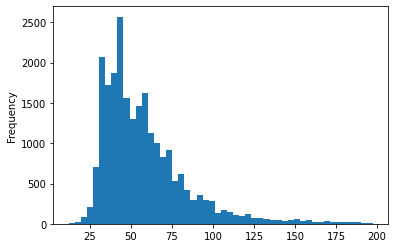

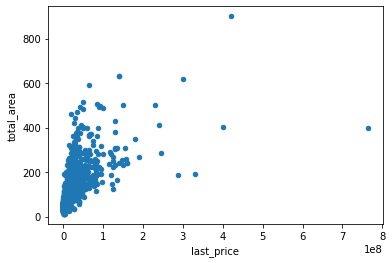

last_price


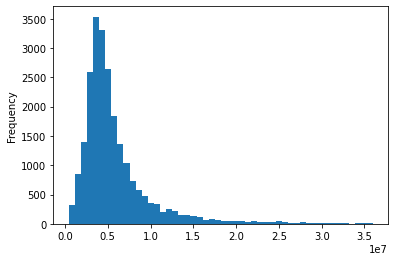

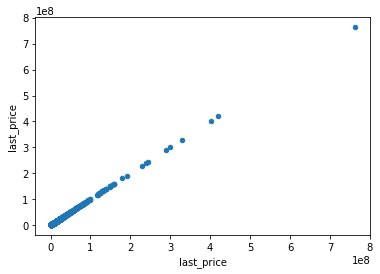

rooms


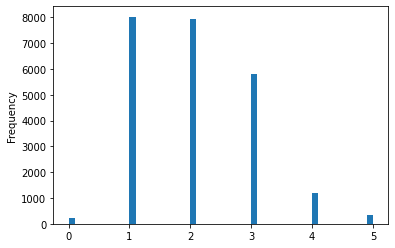

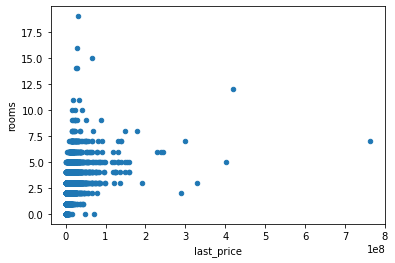

ceiling_height


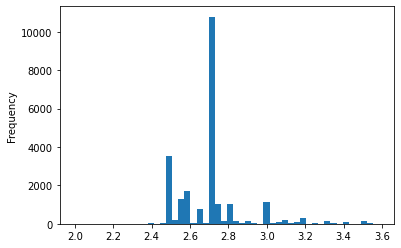

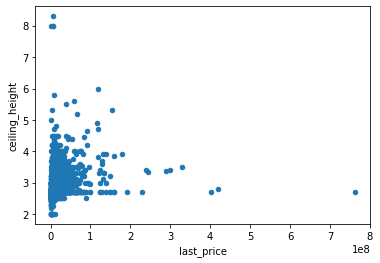

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.636407,0.735588,0.271901
last_price,0.636407,1.000000,0.331968,0.151502
rooms,0.735588,0.331968,1.000000,0.234610
ceiling_height,0.271901,0.151502,0.234610,1.000000


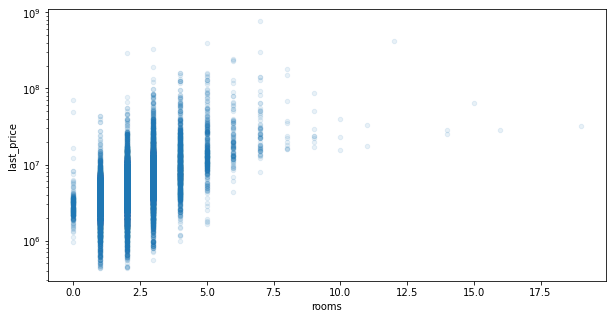

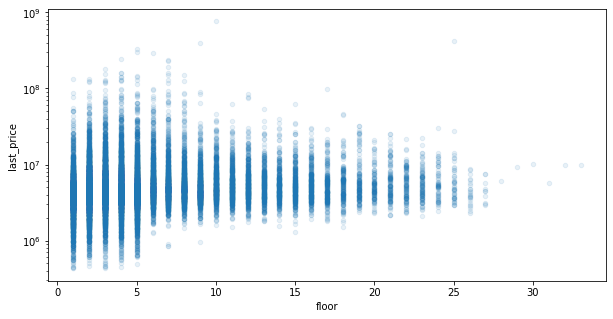

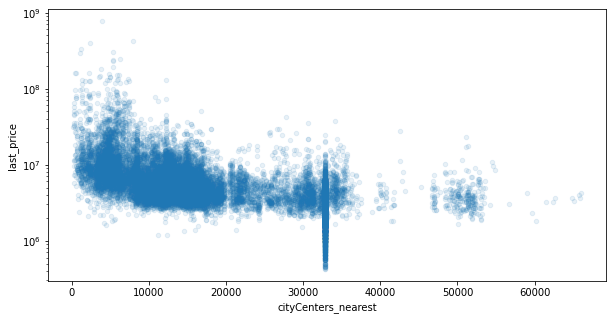

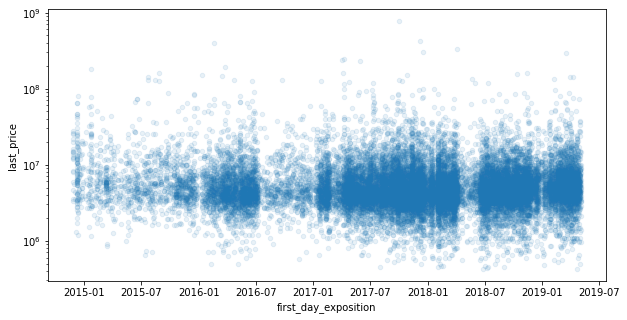

In [107]:
#pd.plotting.scatter_matrix(df[(df['locality_name'] == 'Санкт-Петербург') & (df['to_center_km'] <= 7)][['total_area','last_price','rooms','ceiling_height']],figsize=(15,15),hist_kwds={'bins':20})
#plt.show()
display(df[(df['locality_name'] == 'Санкт-Петербург') & (df['to_center_km'] <= 7)][['total_area','last_price','rooms','ceiling_height']].corr())
display(df[(df['locality_name'] == 'Санкт-Петербург') & (df['to_center_km'] <= 7)][['total_area','last_price','rooms','ceiling_height']].describe(percentiles=[0.5, 0.99]))
for i in df[(df['locality_name'] == 'Санкт-Петербург') & (df['to_center_km'] <= 7)][['total_area','last_price','rooms','ceiling_height']]:   
    print(i)      
    df[i].plot(kind='hist',bins=50,range=(df[i].min(),df[i].quantile(0.99)))
    plt.show()
    df.plot(x='last_price',y=i, kind='scatter')
    plt.show()
display(df[(df['locality_name'] == 'Санкт-Петербург') & (df['to_center_km'] <= 7)][['total_area','last_price','rooms','ceiling_height']].corr())
for i in df[(df['locality_name'] == 'Санкт-Петербург') & (df['to_center_km'] <= 7)][['rooms','floor','cityCenters_nearest','first_day_exposition']]:
    df.plot(x=i,y='last_price', kind='scatter',figsize=(10,5),alpha=0.1)
    plt.yscale('log')   

<font color='DarkBlue'> 
📌 На стоимость по прежнему в большей степени влияет площадь квартир, которая явно коррелируется с количеством комнат, и в меньшей степени расстояние до центра. Стоимость квартир не зависит от высоты потолков, но выявлена стандартная высота потолков у большинства объектов - 2.7 м и 2.3 м <br>
📌 Также на первых этажах наблюдается наибольший разброс цен в сравнении с данными по общей базе, так как скорее всего в центре расположены более старые здания с небольшим количеством этажей. Больше всего объявлений размещено в последнее время, но наблюдаются небольшие перерывы относительно частоты появления новых публикаций ближе к середине 2018 года и в начале 2019
</font>

## Общий вывод

<font color='DarkBlue'> 
📌 В ходе осуществленных исследований выявлено: <br>     
    - предоставленные данные умеренного качества, содержится небольшое количество пропусков и ошибок, присутсвуют как технические ошибки в корректности данных и их отсутствии, так и связанные с явлением человеческого фактора <br>
    - улучшено качество исходного датасета, удалены строки без указания городов и усреднены аномальные и некоторые пропущенные значения в зависимости от типа объявления без использования фактора отклонения, создан готовый алгоритм для следующих преобразований исходных данных <br>
    - стоимость квартиры в основном зависит от ее площади, соответственно количества комнат, а также от населенного пункта и ее близости к его центру; квартиры не на граничных этажах также имеют большую стоимость; с течением времени относительно даты публикаций стоимость не изменяется, но объявлений в источнике данных намного больше; есть слабо прослеживающаяся положительная зависимость между стоимостью квартир и количеством ближайших парков и прудов
</font> 